---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

In [52]:
fruits.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
fruits.shape

(59, 7)

In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

<IPython.core.display.Javascript object>


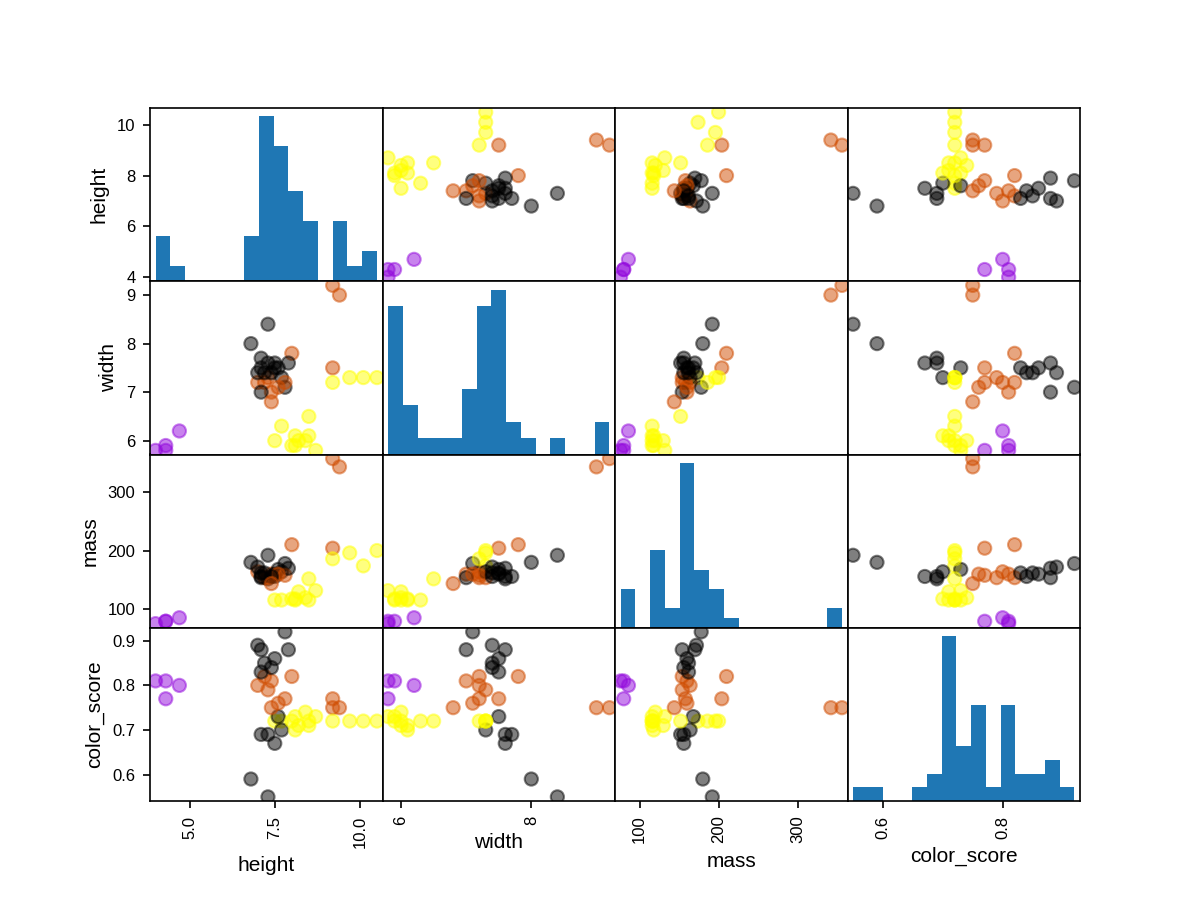

In [5]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split. random_state, it provides seed value to the function's internal random no. generator.
#If we choose different values for that seed value, that will result in different randomized splits for training and test. So, if we want to get the same training and test split each time, we just make sure to pass in the same value of the random state parameter. And so here, we're going to set that parameter to zero for all our examples. 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #this also randomly shuffle

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(8,6), cmap=cmap)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(44, 4) (15, 4) (44,) (15,)


<IPython.core.display.Javascript object>


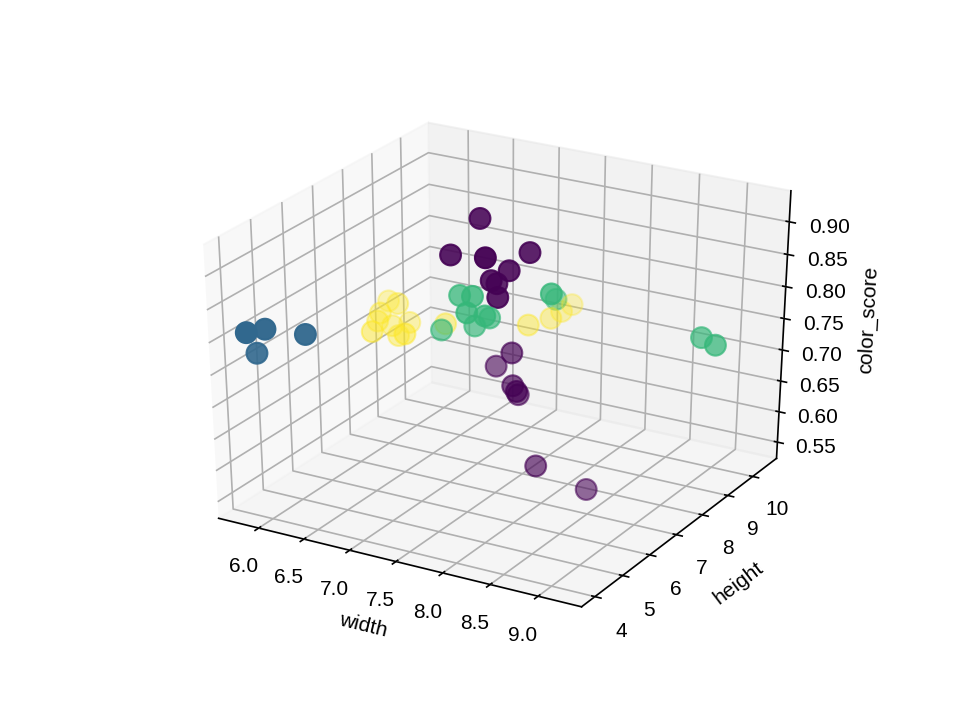

In [8]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [36]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [37]:
'''
we'll use a popular and easy to understand type of machine learning algorithm known as k-nearest neighbors or k-NN. The K-Nearest Neighbors algorithm can be used for classification and regression. Though, here we'll focus for the time being on using it for classification. k-NN classifiers are an example of what's called instance based or memory based supervised learning. What this means is that instance based learning methods work by memorizing the labeled examples that they see in the training set. And then they use those memorized examples to classify new objects later. 


The k in k-NN refers to the number of nearest neighbors the classifier will retrieve and use in order to make its prediction. 

'''

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [39]:
knn.score(X_test, y_test)

0.53333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [48]:
'''

In particular, the k-NN algorithm has three steps that can be specified. First of all, when given a new previously unseen instance of something to classify, 

a k-NN classifier will look into its set of memorized training examples to find the k examples that have closest features. And we'll talk about what closest means in a minute. 

Second, the classifier will look up the class labels for those k-Nearest Neighbor examples. And then once it's done that, it will combine the labels of those examples to make a prediction for the label of the new object. Typically, for example, by using simple majority vote. 







'''

# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
print(fruit_prediction[0]) #label
lookup_fruit_name[fruit_prediction[0]] #it will look in the fruit name for the predicted one


2


'mandarin'

In [50]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
print(fruit_prediction[0]) #label
lookup_fruit_name[fruit_prediction[0]]

4


'lemon'

### Plot the decision boundaries of the k-NN classifier

<IPython.core.display.Javascript object>


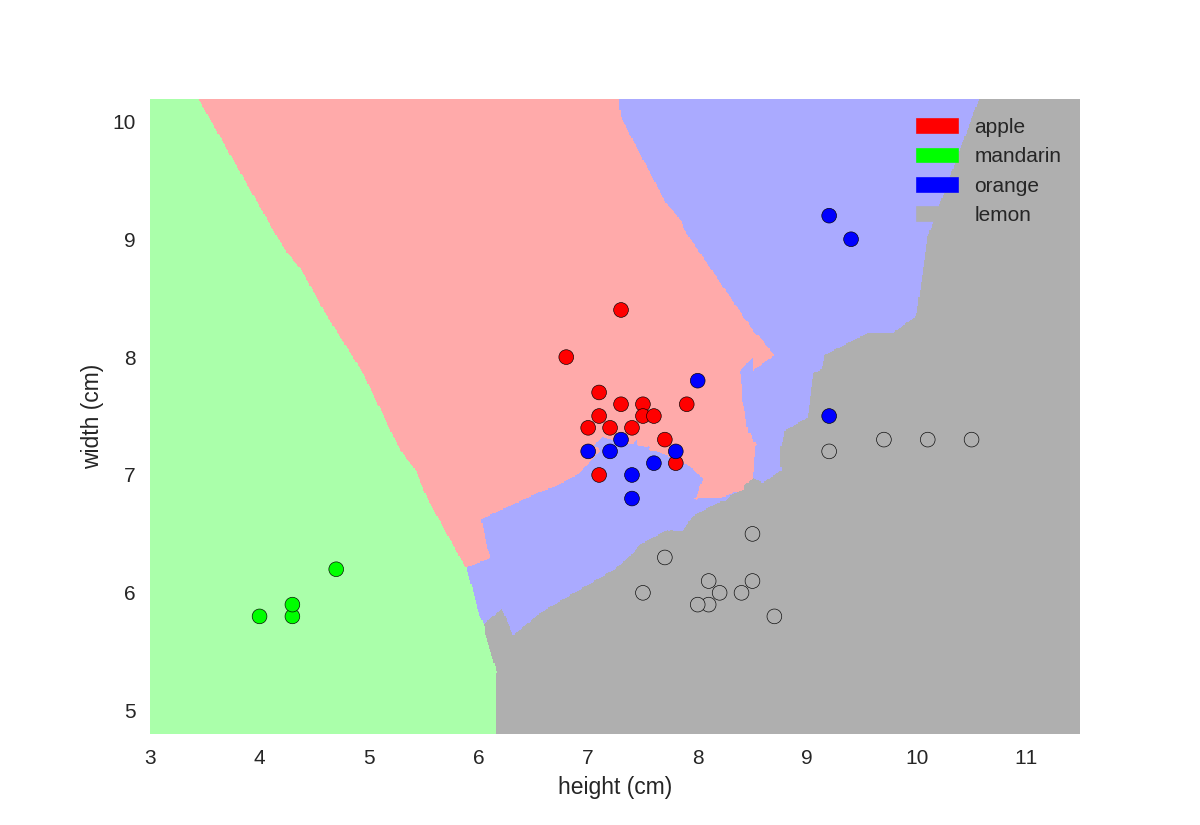

In [56]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


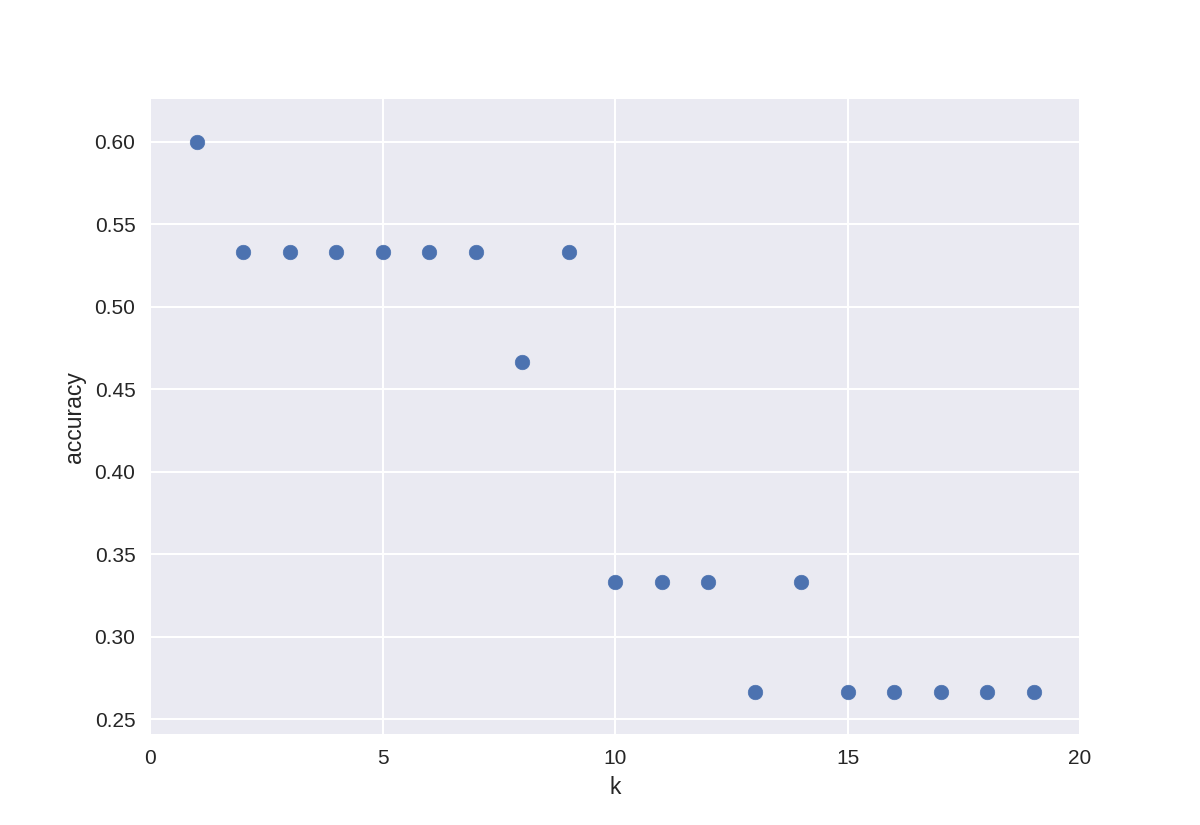

In [16]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);


'''
We can plot the accuracy as a function of k very easily using this short snippet of code. 
We see that, indeed, larger values of k do lead to worse accuracy for this particular dataset and fixed single train test split. 

Keep in mind though, these results are only for this particular training test split. 

'''

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


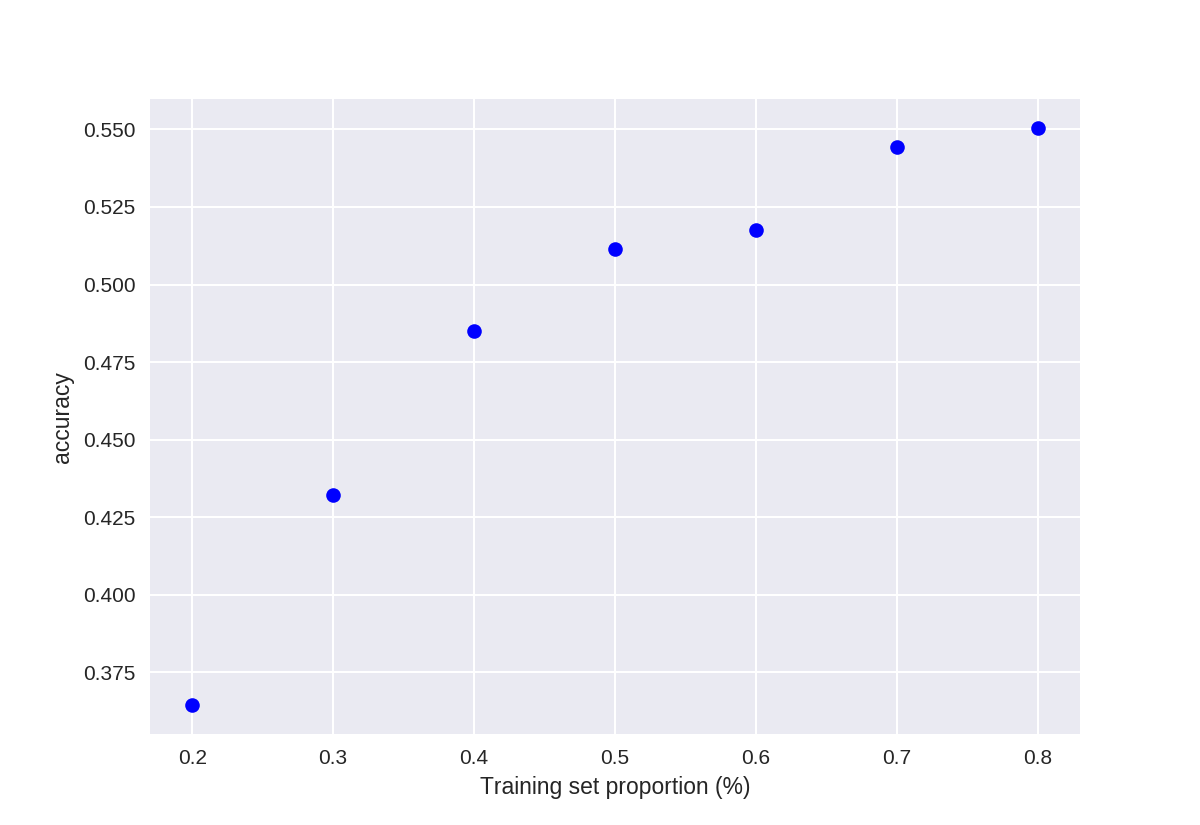

In [17]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [57]:
'''
In general, the best choice of the value of k, that is the one that leads to the highest accuracy, can vary greatly depending on the data set. 
In general with k-nearest neighbors, using a larger k suppresses the effects of noisy individual labels. But results in classification boundaries that are less detailed. 

So we've taken several steps in this course so far. We've looked at a data set, plotted some features. We then took the features and learned how to compute a train test split. Used that to train a classifier and used the resulting classifier to make some predictions for new objects. So congratulations, you've just created and run your first machine learning application in Python. 

'''

"\nIn general, the best choice of the value of k, that is the one that leads to the highest accuracy, can vary greatly depending on the data set. \nIn general with k-nearest neighbors, using a larger k suppresses the effects of noisy individual labels. But results in classification boundaries that are less detailed. \n\nSo we've taken several steps in this course so far. We've looked at a data set, plotted some features. We then took the features and learned how to compute a train test split. Used that to train a classifier and used the resulting classifier to make some predictions for new objects. So congratulations, you've just created and run your first machine learning application in Python. \n\n"